In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
# Import data from CSV's
groceries = pd.read_csv('Resources/grocery_consumption_19_20.csv')
groceries

,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942
1,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
2,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,...,13826,13630,13633,17109,14597,15070,15109,15103,14857,14770
3,Milk dairy products and eggs,89712,88129,89066,89515,89484,89969,90692,90802,89287,...,88958,88590,88048,109224,92285,94312,94746,96189,93489,94164
4,Fats and oils,23724,23232,23513,23978,23663,23900,24337,24396,24194,...,24352,24033,24097,30268,26117,26721,26477,26602,26164,26235
5,Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,...,85618,85193,85144,106379,92262,93807,92650,92934,91172,91742
6,Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,...,30499,30639,30674,38355,32704,33378,32978,33136,32600,32502
7,Sugar and sweets,47493,46588,46787,47761,47776,47296,47721,47710,46768,...,47554,46298,46657,55010,46998,47971,48736,49524,48475,48231
8,Food products not elsewhere classified,151454,147410,150119,150769,151744,151673,153970,153530,152588,...,153434,153724,151106,184953,157001,161062,160482,161763,158760,160188
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,...,17729,17821,17620,21714,18745,19244,18977,19419,18990,19086


In [3]:
# Create a table for each year
#print(groceries.columns)

groceries19 = groceries.loc[:, ['Grocery Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
groceries19.dtypes

groceries20 = groceries.loc[:, ['Grocery Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
groceries20.dtypes

# Remove commas from strings
# data_2015['2015M01'] = data_2015['2015M01'].str.replace(',', '', regex=True)

groceries.describe()

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,81662.666667,79823.916667,80912.500000,81490.333333,81471.416667,81989.750000,82791.666667,82885.833333,82190.333333,82226.000000,...,82277.666667,82076.916667,81748.416667,100135.416667,85666.7500,87579.583333,87032.750000,88207.416667,87151.833333,87473.000000
std,55704.780484,54449.780039,55433.673107,55493.094192,55503.395391,55882.219775,56393.618002,56471.633588,56060.295706,56048.156943,...,55970.100790,56107.118361,55671.977455,68552.910211,58756.6866,59916.320083,59153.564173,60068.727516,59780.285754,60066.534669
min,13586.000000,13216.000000,13567.000000,13808.000000,13676.000000,13909.000000,14027.000000,13986.000000,13882.000000,13746.000000,...,13826.000000,13630.000000,13633.000000,17109.000000,14597.0000,15070.000000,15109.000000,15103.000000,14857.000000,14770.000000
25%,29174.250000,28253.250000,28386.500000,28817.000000,28757.750000,28888.250000,29331.250000,29374.500000,29108.000000,28992.500000,...,28962.250000,28987.500000,29029.750000,36333.250000,31057.2500,31713.750000,31352.750000,31502.500000,30991.000000,30935.250000
50%,81607.000000,79590.500000,80273.000000,81349.000000,81541.500000,82641.000000,83377.000000,83499.500000,83169.500000,83250.500000,...,83340.000000,82821.500000,82828.500000,100091.000000,84989.5000,86667.500000,86586.000000,87691.500000,86276.500000,86852.000000
75%,138296.000000,136285.250000,138242.250000,138840.750000,138702.500000,139515.500000,140200.250000,140487.250000,139898.500000,140271.000000,...,141182.250000,141456.750000,141289.250000,168805.750000,148817.0000,155587.750000,154846.500000,155772.750000,154459.250000,154364.500000
max,162972.000000,158595.000000,161825.000000,161893.000000,161123.000000,162745.000000,164394.000000,164896.000000,163265.000000,162487.000000,...,160863.000000,160228.000000,159684.000000,201253.000000,170529.0000,167545.000000,162020.000000,168507.000000,168277.000000,169222.000000


In [4]:
totalGroceries19 = groceries19.sum(axis=1)
groceries19['Total'] = totalGroceries19
groceries19

,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,Total
0,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,1279026
1,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,1461708
2,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,123657
3,Milk dairy products and eggs,89712,88129,89066,89515,89484,89969,90692,90802,89287,806656
4,Fats and oils,23724,23232,23513,23978,23663,23900,24337,24396,24194,214937
5,Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,750017
6,Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,275142
7,Sugar and sweets,47493,46588,46787,47761,47776,47296,47721,47710,46768,425900
8,Food products not elsewhere classified,151454,147410,150119,150769,151744,151673,153970,153530,152588,1363257
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,157293


In [5]:
grocery_2019_all = groceries[['Grocery Consumption Category ', '2019M01', '2019M02', '2019M03',
       '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09',
       '2019M10', '2019M11', '2019M12']]
grocery_2019_all

,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12
0,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,142962,142816,142791
1,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,162487,162542,160863
2,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,13746,13867,13826
3,Milk dairy products and eggs,89712,88129,89066,89515,89484,89969,90692,90802,89287,89444,89189,88958
4,Fats and oils,23724,23232,23513,23978,23663,23900,24337,24396,24194,24197,24202,24352
5,Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,84823,85240,85618
6,Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,30591,30527,30499
7,Sugar and sweets,47493,46588,46787,47761,47776,47296,47721,47710,46768,47024,46936,47554
8,Food products not elsewhere classified,151454,147410,150119,150769,151744,151673,153970,153530,152588,152720,152409,153434
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,17666,17510,17729


In [6]:
totalGroceries20 = groceries20.sum(axis=1)
groceries20['Total'] = totalGroceries20
groceries20

,Grocery Consumption Category,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,Total
0,Cereals and bakery products,143562,143129,177724,150935,155017,153845,155114,153090,152942,1385358
1,Meats and poultry,160228,159684,201253,170529,167545,162020,168507,168277,169222,1527265
2,Fish and seafood,13630,13633,17109,14597,15070,15109,15103,14857,14770,133878
3,Milk dairy products and eggs,88590,88048,109224,92285,94312,94746,96189,93489,94164,851047
4,Fats and oils,24033,24097,30268,26117,26721,26477,26602,26164,26235,236714
5,Fresh fruits and vegetables,85193,85144,106379,92262,93807,92650,92934,91172,91742,831283
6,Processed fruits and vegetables,30639,30674,38355,32704,33378,32978,33136,32600,32502,296966
7,Sugar and sweets,46298,46657,55010,46998,47971,48736,49524,48475,48231,437900
8,Food products not elsewhere classified,153724,151106,184953,157001,161062,160482,161763,158760,160188,1449039
9,Coffee tea and other beverage materials,17821,17620,21714,18745,19244,18977,19419,18990,19086,171616


In [7]:
groceryYearTotals = pd.DataFrame({
    'Category': groceries19['Grocery Consumption Category '],
    '2019': totalGroceries19,
    '2020': totalGroceries20
    
})
groceryYearTotals

,Category,2019,2020
0,Cereals and bakery products,1279026,1385358
1,Meats and poultry,1461708,1527265
2,Fish and seafood,123657,133878
3,Milk dairy products and eggs,806656,851047
4,Fats and oils,214937,236714
5,Fresh fruits and vegetables,750017,831283
6,Processed fruits and vegetables,275142,296966
7,Sugar and sweets,425900,437900
8,Food products not elsewhere classified,1363257,1449039
9,Coffee tea and other beverage materials,157293,171616


([<matplotlib.axis.XTick at 0x7fdcfe378a58>,
 [Text(1, 0, '          Cereals and bakery products'),
  Text(2, 0, '          Meats and poultry'),
  Text(3, 0, '          Fish and seafood'),
  Text(4, 0, '          Milk dairy products and eggs'),
  Text(5, 0, '          Fats and oils'),
  Text(6, 0, '          Fresh fruits and vegetables'),
  Text(7, 0, '          Processed fruits and vegetables'),
  Text(8, 0, '          Sugar and sweets'),
  Text(9, 0, '          Food products not elsewhere classified'),
  Text(10, 0, '          Coffee tea and other beverage materials'),
  Text(11, 0, '          Mineral waters soft drinks and vegetable juices'),
  Text(12, 0, '          Alcoholic beverages purchased for off-premises consumption')])

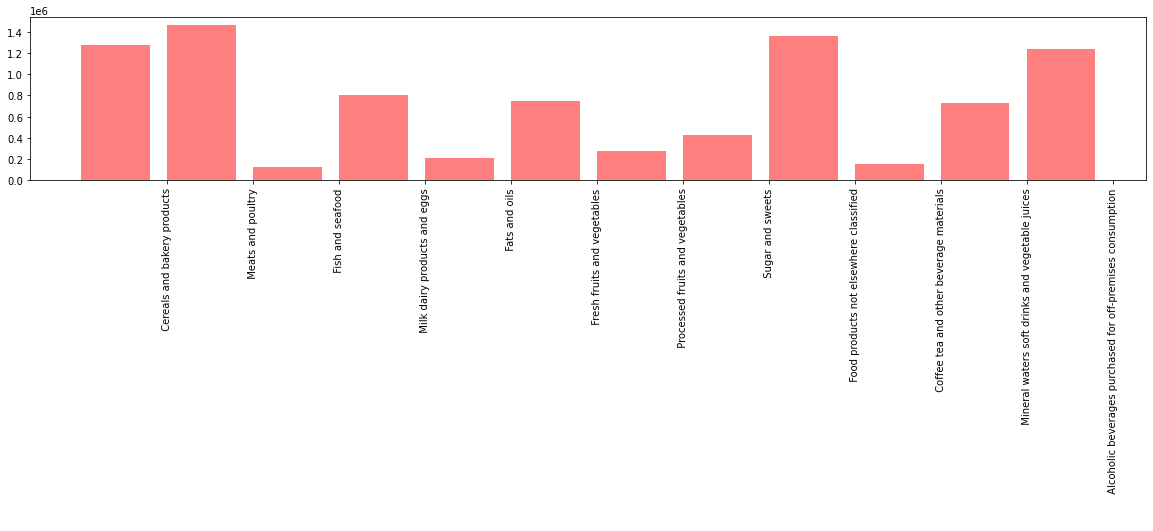

In [8]:
# 2019 grocery totals by category
x_axis = np.arange(len(groceryYearTotals))
tick_locations = [value+1 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, groceryYearTotals["2019"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, groceryYearTotals["Category"], rotation="vertical")

([<matplotlib.axis.XTick at 0x7fdcfea7e128>,
 [Text(0, 0, '          Cereals and bakery products'),
  Text(1, 0, '          Meats and poultry'),
  Text(2, 0, '          Fish and seafood'),
  Text(3, 0, '          Milk dairy products and eggs'),
  Text(4, 0, '          Fats and oils'),
  Text(5, 0, '          Fresh fruits and vegetables'),
  Text(6, 0, '          Processed fruits and vegetables'),
  Text(7, 0, '          Sugar and sweets'),
  Text(8, 0, '          Food products not elsewhere classified'),
  Text(9, 0, '          Coffee tea and other beverage materials'),
  Text(10, 0, '          Mineral waters soft drinks and vegetable juices'),
  Text(11, 0, '          Alcoholic beverages purchased for off-premises consumption')])

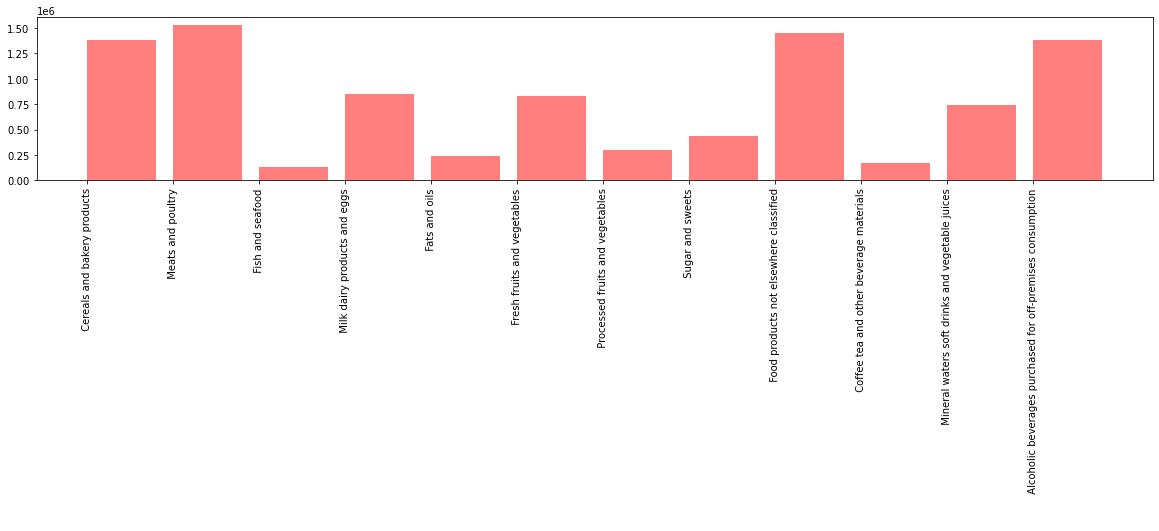

In [9]:
# 2020 grocery totals by category
x_axis = np.arange(len(groceryYearTotals))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, groceryYearTotals["2020"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, groceryYearTotals["Category"], rotation="vertical")

In [10]:
# necessity items

necessities = pd.read_csv('Resources/necessityitems_consumption_19_20.csv')
necessities

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279,...,403003,414196,412515,348239,258098,312138,352503,363811,369140,374007
1,Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489,...,7358,7555,7541,6383,4743,5721,6446,6656,6742,6831
2,Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515,...,21250,19725,21692,23366,27167,30496,27746,26913,26182,28497
3,Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587,...,1497,1428,1438,1347,1361,1418,1388,1398,1425,1479
4,Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687,...,393525,397892,404197,429613,392311,396323,404648,408873,412429,417457
5,Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062,...,77449,78626,79126,85388,76229,79927,82875,85731,84330,84740
6,Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584,...,6523,6612,6614,6215,5233,5800,6284,6791,6945,7151
7,Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676,...,39571,39791,40017,46227,40557,42437,42594,41637,41494,41810
8,Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374,...,37652,38042,37937,44706,37601,39052,39452,37998,37965,39656
9,Household linens,50275,52134,52048,53455,53907,55545,55025,54317,53697,...,56232,53555,52812,50236,42161,51225,54864,56319,56326,56894


In [35]:
necessities19 = necessities.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
necessities19.dtypes

necessities20 = necessities.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
necessities20.dtypes

necessities.describe()

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,80212.800000,80605.600000,80797.533333,81083.80000,81097.000000,81732.133333,81685.866667,82245.733333,81850.400000,82144.533333,...,81104.266667,82079.133333,82415.133333,81300.000000,69757.066667,76030.333333,80133.200000,81526.000000,81930.066667,83190.466667
std,130904.951081,131670.947307,131692.993362,132315.60156,131728.341512,132625.349323,132508.001569,134195.807401,133446.073575,133895.057828,...,131306.974802,134059.772951,134783.083585,128764.443953,109395.287332,116871.688144,124436.517884,127008.446028,128534.417774,130051.608505
min,1614.000000,1628.000000,1677.000000,1610.00000,1589.000000,1638.000000,1621.000000,1618.000000,1587.000000,1565.000000,...,1497.000000,1428.000000,1438.000000,1347.000000,1361.000000,1418.000000,1388.000000,1398.000000,1425.000000,1479.000000
25%,8633.000000,8636.000000,8646.500000,8734.50000,8711.000000,8762.000000,8734.500000,8814.500000,8743.500000,8776.500000,...,8620.500000,8806.000000,8752.000000,8303.000000,7420.500000,8306.000000,8835.500000,8983.500000,9032.000000,9200.000000
50%,38486.000000,38043.000000,37969.000000,38330.00000,38133.000000,38033.000000,38614.000000,38772.000000,38374.000000,38328.000000,...,37652.000000,38042.000000,37937.000000,44706.000000,37601.000000,39052.000000,39452.000000,37998.000000,37965.000000,39656.000000
75%,65790.500000,65948.500000,66434.500000,66564.50000,67312.000000,67532.000000,67393.000000,66651.500000,66960.500000,67494.500000,...,67668.000000,68057.000000,67261.500000,69307.000000,60503.500000,66115.000000,69521.500000,71348.500000,71110.000000,72470.000000
max,416232.000000,413890.000000,411127.000000,419375.00000,411998.000000,413314.000000,410698.000000,417331.000000,411279.000000,417060.000000,...,403003.000000,414196.000000,412515.000000,429613.000000,392311.000000,396323.000000,404648.000000,408873.000000,412429.000000,417457.000000


In [12]:
totalNecessities19 = necessities19.sum(axis=1)
necessities19['Total'] = totalNecessities19
necessities19

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,Total
0,Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279,3725244
1,Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489,68110
2,Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515,210729
3,Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587,14582
4,Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687,3492432
5,Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062,692995
6,Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584,58165
7,Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676,355850
8,Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374,344754
9,Household linens,50275,52134,52048,53455,53907,55545,55025,54317,53697,480403


In [13]:

totalNecessities20 = necessities20.sum(axis=1)
necessities20['Total'] = totalNecessities20
necessities20

,Consumption Category,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,Total
0,Gasoline and other motor fuel,414196,412515,348239,258098,312138,352503,363811,369140,374007,3204647
1,Lubricants and fluids,7555,7541,6383,4743,5721,6446,6656,6742,6831,58618
2,Fuel oil,19725,21692,23366,27167,30496,27746,26913,26182,28497,231784
3,Other fuels,1428,1438,1347,1361,1418,1388,1398,1425,1479,12682
4,Prescription drugs,397892,404197,429613,392311,396323,404648,408873,412429,417457,3663743
5,Nonprescription drugs,78626,79126,85388,76229,79927,82875,85731,84330,84740,736972
6,Other medical products,6612,6614,6215,5233,5800,6284,6791,6945,7151,57645
7,Household cleaning products,39791,40017,46227,40557,42437,42594,41637,41494,41810,376564
8,Household paper products,38042,37937,44706,37601,39052,39452,37998,37965,39656,352409
9,Household linens,53555,52812,50236,42161,51225,54864,56319,56326,56894,474392


In [14]:
necessityYearTotals = pd.DataFrame({
    'Category': necessities19['Consumption Category '],
    '2019': totalNecessities19,
    '2020': totalNecessities20
    
})
necessityYearTotals = necessityYearTotals['Category'].str.lstrip()


In [15]:
q1_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Jan 2019': necessities['2019M01'],
    'Jan 2020': necessities['2020M01'],
    'Feb 2019': necessities['2019M02'],
    'Feb 2020': necessities['2020M02'],
    'Mar 2019': necessities['2019M03'],
    'Mar 2020': necessities['2020M03']
})
q1_data

,Category,Jan 2019,Jan 2020,Feb 2019,Feb 2020,Mar 2019,Mar 2020
0,Gasoline and other motor fuel,416232,414196,413890,412515,411127,348239
1,Lubricants and fluids,7617,7555,7591,7541,7545,6383
2,Fuel oil,24220,19725,23751,21692,24371,23366
3,Other fuels,1614,1428,1628,1438,1677,1347
4,Prescription drugs,376230,397892,383557,404197,386897,429613
5,Nonprescription drugs,76356,78626,76578,79126,76869,85388
6,Other medical products,6348,6612,6393,6614,6504,6215
7,Household cleaning products,39808,39791,39000,40017,39233,46227
8,Household paper products,38486,38042,38043,37937,37969,44706
9,Household linens,50275,53555,52134,52812,52048,50236


In [16]:
q2_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Apr 2019': necessities['2019M04'],
    'Apr 2020': necessities['2020M04'],
    'May 2019': necessities['2019M05'],
    'May 2020': necessities['2020M05'],
    'Jun 2019': necessities['2019M06'],
    'Jun 2020': necessities['2020M06']
})
q2_data

,Category,Apr 2019,Apr 2020,May 2019,May 2020,Jun 2019,Jun 2020
0,Gasoline and other motor fuel,419375,258098,411998,312138,413314,352503
1,Lubricants and fluids,7660,4743,7535,5721,7555,6446
2,Fuel oil,23015,27167,22774,30496,23604,27746
3,Other fuels,1610,1361,1589,1418,1638,1388
4,Prescription drugs,381678,392311,386486,396323,390877,404648
5,Nonprescription drugs,76924,76229,77264,79927,77546,82875
6,Other medical products,6409,5233,6423,5800,6428,6284
7,Household cleaning products,39404,40557,39403,42437,39517,42594
8,Household paper products,38330,37601,38133,39052,38033,39452
9,Household linens,53455,42161,53907,51225,55545,54864


In [17]:
q3_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Jul 2019': necessities['2019M07'],
    'Jul 2020': necessities['2020M07'],
    'Aug 2019': necessities['2019M08'],
    'Aug 2020': necessities['2020M08'],
    'Sep 2019': necessities['2019M09'],
    'Sep 2020': necessities['2020M09']
})
q3_data

,Category,Jul 2019,Jul 2020,Aug 2019,Aug 2020,Sep 2019,Sep 2020
0,Gasoline and other motor fuel,410698,363811,417331,369140,411279,374007
1,Lubricants and fluids,7506,6656,7612,6742,7489,6831
2,Fuel oil,23258,26913,23221,26182,22515,28497
3,Other fuels,1621,1398,1618,1425,1587,1479
4,Prescription drugs,392962,408873,396058,412429,397687,417457
5,Nonprescription drugs,77802,85731,76594,84330,77062,84740
6,Other medical products,6545,6791,6531,6945,6584,7151
7,Household cleaning products,39833,41637,39976,41494,39676,41810
8,Household paper products,38614,37998,38772,37965,38374,39656
9,Household linens,55025,56319,54317,56326,53697,56894


In [18]:
graph_necessities_df = necessities.set_index("Consumption Category ")
graph_necessities_df

#.str.lstrip()

months = graph_necessities_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph19_df = graph_necessities_df[['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']]
months = graph19_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]


graph20_df = graph_necessities_df[['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']]
months = graph20_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

In [36]:
graph_necessities_df.columns

Index(['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09'],
      dtype='object')

In [20]:
graph19_df

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09
Consumption Category,,,,,,,,,
Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279
Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489
Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515
Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587
Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687
Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062
Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584
Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676
Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374


In [21]:
graph20_df

,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,
Gasoline and other motor fuel,414196,412515,348239,258098,312138,352503,363811,369140,374007
Lubricants and fluids,7555,7541,6383,4743,5721,6446,6656,6742,6831
Fuel oil,19725,21692,23366,27167,30496,27746,26913,26182,28497
Other fuels,1428,1438,1347,1361,1418,1388,1398,1425,1479
Prescription drugs,397892,404197,429613,392311,396323,404648,408873,412429,417457
Nonprescription drugs,78626,79126,85388,76229,79927,82875,85731,84330,84740
Other medical products,6612,6614,6215,5233,5800,6284,6791,6945,7151
Household cleaning products,39791,40017,46227,40557,42437,42594,41637,41494,41810
Household paper products,38042,37937,44706,37601,39052,39452,37998,37965,39656


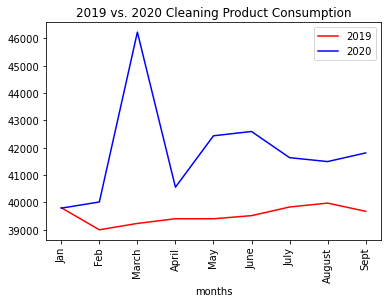

In [34]:
# 2019 vs. 2020 Cleaning Product Consumption
cleaningproduct19 = plt.plot(months, graph19_df.loc['Household cleaning products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

cleaningproduct20 = plt.plot(months, graph20_df.loc['Household cleaning products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Cleaning Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

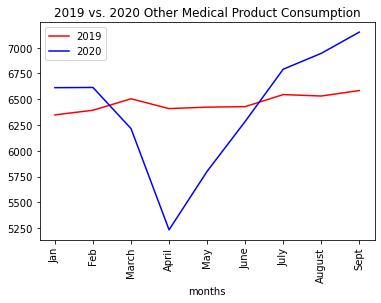

In [32]:
# 2019 vs. 2020 Other Medical Product Consumption
othermedicalproduct19 = plt.plot(months, graph19_df.loc['Other medical products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

othermedicalproduct20 = plt.plot(months, graph20_df.loc['Other medical products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Other Medical Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

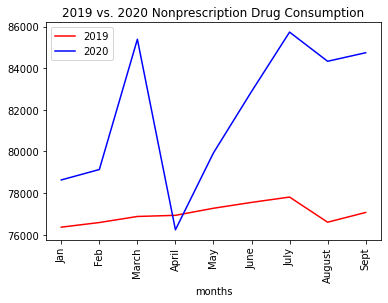

In [31]:
# 2019 vs. 2020 Other Medical Product Consumption
nonpresceiptiondrugs19 = plt.plot(months, graph19_df.loc['Nonprescription drugs',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

nonprescriptiondrugs20 = plt.plot(months, graph20_df.loc['Nonprescription drugs',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Nonprescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()